# DSCI511 Python Panda Review Session <Quiz 2>

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

## 1. Dataframe VS Series

- **Dataframe is like a dictionary, but it is much more than a dictionary**
    ```python
    my_map = {“col0”: [row0_1, row0_2, row0_3], 
              “col1”: [row1_1, row1_2, row1_3],
              “col2”: [row2_1, row2_2, row2_3],
              “col3”: [row3_1, row3_2, row3_3]}
    df = pd.DataFrame(my_map)
    ```
    
    
- **A Series is a column in the dataframe**
    - A Series is like a NumPy array but with labels.
    - 1-dimensional
    - can contain any data type or a mix of them
    - labels may be integers or strings
    - ```python
      pd.Series(place_holder)
      ```
     the placeholder can be any dtypes
          - a scalar
          - a list
          - ndarray
          - dictionary (then the Series has default index)
          - object & string (USE MORE MEMORY)
- **for series, use uniformed dtypes**

## 2. DataFrame

In [115]:
# load stackoverflow data
df = pd.read_csv('data/survey_results_public.csv')
schema_df = pd.read_csv('data/survey_results_schema.csv', index_col='Column')

In [2]:
# Create DataFrame from Lists of lists
df1 = pd.DataFrame([['Tom', 7], ['Mike', 15], ['Tiffany', 3]])


# Create DataFrame from ndarray
df2 = pd.DataFrame(np.array([['Tom',7], ['Mike', 15], ['Tiffany', 3]]))


# Create DataFrame from Dictionary
df3 = pd.DataFrame({"Name": ['Tom', 'Mike', 'Tiffany'], "Number": [7, 15, 3]})


# Create DataFrame from List of tuples
df4 = pd.DataFrame(zip(['Tom', 'Mike', 'Tiffany'], [7, 15, 3]))


# Create DataFrame from Series
df5 = pd.DataFrame({"Name": pd.Series(['Tom', 'Mike', 'Tiffany']), "Number": pd.Series([7, 15, 3])})

### 1) df attributes

In [100]:
# df.shape
# df.info(verbose=True)
# df.columns
# df.head(2)
# df.describe(include='all')
# df.describe()
# df.head(10).style.background_gradient(cmap='plasma')

In [5]:
# df to markdown table
# df1 = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# df1.to_markdown()

### 2) df operations

[Operations Doc](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html)

[Views VS Copies](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)

In [6]:
# get the max value for each numerical column
df.max()


# get the mean value for a specific numerical column
df['Age'].mean()


# get the row number for a specific numerical column
# df['Age'].idxmin()


# get the sum value for each numerical column
# df.sum()


# get the mean value for each numerical column
# df.mean()


# sort the dataframe according to something
# df.sort_values(by='Age', ascending=False)


# count Categorical values in a row
# df.columns
df['Sexuality'].value_counts()
# df['Hobbyist'].value_counts()['Yes']/df.shape[0]

Straight / Heterosexual                                  40118
Bisexual                                                  1918
Gay or Lesbian                                             978
Bisexual;Straight / Heterosexual                           258
Queer                                                      249
Bisexual;Queer                                             191
Gay or Lesbian;Queer                                        90
Straight / Heterosexual;Queer                               56
Bisexual;Gay or Lesbian                                     40
Bisexual;Gay or Lesbian;Straight / Heterosexual;Queer       39
Bisexual;Gay or Lesbian;Queer                               24
Gay or Lesbian;Straight / Heterosexual                      13
Bisexual;Straight / Heterosexual;Queer                      10
Bisexual;Gay or Lesbian;Straight / Heterosexual              8
Name: Sexuality, dtype: int64

### 3) df indexing -> Views vs Copies (SettingWithCopyWarning)
how powerful **pandas** is!!

In [14]:
# ------------------------------------------------ df[] --------------------------------------------
# Select column - get a Series
df["Country"]

# Select row slice - get a DataFrame with all cols
df[20000:20010]

# Select by boolean df[boolean, col_name(s)]- return a `copied DataFrame`, series - all possible
df[df['Age'] > 50]
# df[df['Age'] > 50]['Age'] = 50 #!!! Cannot do this - [SettingWithCopyWarning] - Views VS Copies


# ---------------------------------- df.loc[row_label(s), col_label(s)] -----------------------------
# Select row/column by label
df.loc[:, 'Age':'Country']
df.loc[[20006, 60000], ['CompTotal', 'Country']]


# Select by row integer & column label
df.loc[df.index[20006], ['CompTotal', 'Country', 'EdLevel', 'Age', 'LanguageWorkedWith']]



# ---------------------------------- df.iloc[row_int(s), col_int(s)] -----------------------------
# Select row/column by integer
df.iloc[20006, 20]



# ---------------------------------- mix type -----------------------------
# Select by row integer & column label - df.loc[df.index[row_int], col_label]
df.loc[df.index[20006], 'Country']

# Select by row label & column integer - df.loc[20006, df.columns[20]]
df.loc[20006, df.columns[5]]


# ---------------------------------- Select by boolean expression -----------------------------
salary_threshold = 200000
df.query("CompTotal > @salary_threshold")

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
43,44,I am a developer by profession,No,32.0,21,Yearly,244000.0,55893.0,Brazil,Brazilian real,BRL,Microsoft SQL Server,Microsoft SQL Server,"Data or business analyst;Developer, back-end;P...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,White or of European descent,Man,Industry that I’d be working in;Specific depar...,Neither satisfied nor dissatisfied,"I’m not actively looking, but I am open to new...",HTML/CSS;Java;JavaScript;Python;R;SQL,HTML/CSS;Python;R;SQL;VBA,NaN,NaN,Github;Slack;Trello,Github;Slack;Trello,No,Somewhat important,Very important,Having a bad day (or week or month) at work;Cu...,Company reviews from third party sites (e.g. G...,Once every few years,No,No,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Call a coworker or friend;Visit Stack Overflow...,Windows,10 to 19 employees,Linux;Windows,Windows,I have some influence,Straight / Heterosexual,Yes,"Yes, somewhat",A few times per month or weekly,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,NaN,Just as welcome now as I felt last year,45.0,10,6
66,67,I am a developer by profession,Yes,35.0,6,Yearly,250000.0,250000.0,United States,United States dollar,USD,PostgreSQL;Redis,Firebase;PostgreSQL;Redis,"Developer, full-stack;Product manager;Senior e...","Professional degree (JD, MD, etc.)",Employed full-time,White or of European descent,Man,"Languages, frameworks, and other technologies ...",Very satisfied,I am not interested in new job opportunities,Rust,HTML/CSS;JavaScript;Ruby,NaN,NaN,"Github;Slack;Google Suite (Docs, Meet, etc)","Github;Gitlab;Slack;Trello;Google Suite (Docs,...",No,Extremely important,Fairly important,Curious about other opportunities;Trouble with...,"Read company media, such as employee blogs or ...",Once a year,NaN,Onboarding? What onboarding?,No,Rarely: 1-2 days per year or less,Start a free trial;Ask developers I know/work ...,Annoyed,NaN,Call a coworker or friend;Go for a walk or oth...,Linux-based,2 to 9 employees,Docker;Google Cloud Platform,Docker;Google Cloud Platform;Heroku;Kubernetes...,I have a great deal of influence,Straight / Heterosexual,NaN,NaN,NaN,NaN,Easy,Appropriate in length,No,"Another engineering discipline (such as civil,...",React.js,Ruby on Rails,NaN,40.0,30,15
68,69,I am a developer by profession,Yes,25.0,12,Yearly,550000.0,594539.0,France,European Euro,EUR,PostgreSQL,MongoDB,Data scientist or machine learning specialist;...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,White or of European descent,Man,Flex time or a flexible schedule;How widely us...,Very satisfied,I am not interested in new job opportunities,Python;Rust;Scala;SQL,HTML/CSS;Python,Keras;Pandas;TensorFlow,Keras;Pandas;TensorFlow,"Github;Slack;Google Suite (Docs, Meet, etc)",Confluence;Jira;Github;Slack;Google Suite (Doc...,Yes,Extremely important,Very important,Curious about other opportunities;Better compe...,"Read company media, such as employee blogs or ...",Once a year,No,No,No,Sometimes: 1-2 days per month but less than we...

### 4) Filtering -> mask to df

In [18]:
# --------------------------- 1. pass a list of bools into `loc` ------------------
countries = ['United States', 'China', 'United Kingdom', 'Australia', 'Canada']
filt1 = df['Country'].isin(countries)

df.loc[filt1, ['Country', 'CompTotal']]


# --------------------------- 2. strin methods - string column filter ------------------
filt2 = df['LanguageWorkedWith'].str.contains('Python', na=False)

df.loc[filt2, 'LanguageWorkedWith']

2                                 Objective-C;Python;Swift
7                                               Python;SQL
9                      HTML/CSS;Java;JavaScript;Python;SQL
12                                     C;JavaScript;Python
14        Bash/Shell/PowerShell;C;HTML/CSS;Java;Python;SQL
                               ...                        
64433    Bash/Shell/PowerShell;HTML/CSS;JavaScript;Perl...
64438       C++;HTML/CSS;JavaScript;Python;Ruby;TypeScript
64443              C++;HTML/CSS;Java;JavaScript;Python;SQL
64446    Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;J...
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
Name: LanguageWorkedWith, Length: 25287, dtype: object

### 5) set df index
a nice unique identifier for a row

In [117]:
# approach 1:
# df.set_index("Respondent", inplace=True)
# schema_df.set_index('Column', inplace=True)

# rename index
# df.index.name="New Index"

# approach 2:
# df = pd.read_csv('data/survey_results_public.csv', index_col='Respondent')


# approach 3: reset index
# df = df.reset_index()
# df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [9]:
# df.head(10)


# after set index, we can use `loc`
# schema_df.loc['Respondent', 'QuestionText']
# schema_df.loc[1] # we cannot do this anymore


# sort index
# schema_df.sort_index(ascending=False)

# schema_df.head(10)


### 6) Update rows and columns -> **`apply` method**

In [33]:
# # --------------------------- 1. rename all columns  ------------------
# # using list comprehension
# # df.columns = [x.lower() for x in df.columns]

# # using str methods
# df.columns = df.columns.str.replace(" ", "_")




# # --------------------------- 2. rename some columns - rename, str, apply  ------------------
# # ---------------- 1) using rename method ----------------
# df.rename(
#     columns={"respondent": "respondent_id", 
#              "convertedcomp": "salary_in_us"},
#     inplace=True)


# # ---------------- 2) using str method ----------------
# # df['country'] = df['country'].str.upper()


# # ---------------- 3) using apply ----------------
'''
1) apply on a series
'''
# # df['country'] = df['country'].apply(len)


'''
2). apply on a df (run a func on all `colmns`/`series` on that df)
df.apply(), applies a function column-wise or row-wise across a dataframe (the function must be able to accept/return an array)
'''
# df.apply(len, axis='columns')
# df.apply(pd.Series.min) # work on numeric values



# # ---------- 4) using applymap (apply func to every cell) ----------
'''
df.applymap(), applies a function element-wise (for functions that accept/return single values at a time)
'''
# df.applymap(str.lower)






# # ------------------------------------------- 3. update a row's all data  ----------------------------------
# # df.loc[2] = [ a list of new values]






# # ------------------------------------------- 4. update a row's some data  ----------------------------------
# 1) using df.loc[2, []] = [ a list of new values]
# df.loc[2, ["age", "country"]] = [1000, "china"]
# df.loc[2, "country"] = "china"
# df.at[2, 'country'] = 'china'


# 2) using `map` which is equal to case_when in R: others will be NaN
# df['country'].map({
#     'china': "the People's Republic of China",
#     'united states': 'USA'
# })

# df['hobbyist'].map({'Yes': True,
#                    'No': False})

# # repalce will not make others be NaN


### 7) Add/Remove Columns

In [130]:
# create a data frame
people1 = {
    'first': ['Corey', 'Jane', 'John'], 
    'last': ['Schafer', 'Doe', 'Doe'], 
    'email': ['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com']
}
ppl = pd.DataFrame(people1)


# ---------------------- add a new column ----------------------
ppl['full_name'] = ppl['first'] + ' ' + ppl['last']


# ---------------------- remove a column ----------------------
ppl.drop(columns = ['first'], inplace=True)


# split a column into two parts
# ppl['full_name'].str.split(' ', expand=True)
# add back to df
ppl[['first', 'last']] = ppl['full_name'].str.split(' ', expand=True)
ppl

,last,email,full_name,first
0,Schafer,CoreyMSchafer@gmail.com,Corey Schafer,Corey
1,Doe,JaneDoe@email.com,Jane Doe,Jane
2,Doe,JohnDoe@email.com,John Doe,John


### 8) Add/Remove rows -> stick two dfs

In [194]:
# ---------------------- add a single row ----------------------
ppl_new = ppl.append({
    'first': "frank",
    'last': 'wang',
    'email': 'frank@gmail.com'},
    ignore_index=True)
ppl_new # != ppl



# ---------------------- append df - rbind(R) ----------------------
people2 = {
    'first': ['bla', 'Jane', 'frank'], 
    'last': ['Schafer', 'toby', 'wang'], 
    'email': ['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com']
}
ppl2 = pd.DataFrame(people2)


# way1: use append method to append two dfs (indexes get increased if ignore_index=True)
# ------
# ppl1_ppl2 = ppl.append(ppl2, ignore_index=True)


# way2: use concat method to concat two dfs (indexes get increased if ignore_index=True)
# ------
ppl1_ppl2 = pd.concat((ppl, ppl2), axis=0, ignore_index=True)
ppl1_ppl2




# ---------------------- remove a single row ----------------------
# ppl1_ppl2.drop(3)




# ---------------------- remove multiple rows ----------------------
# filt_doe = ppl1_ppl2['last' ]== 'Doe'
# ppl1_ppl2.drop(index = ppl1_ppl2[filt_doe].index)

,last,email,full_name,first
0,Schafer,CoreyMSchafer@gmail.com,Corey Schafer,Corey
1,Doe,JaneDoe@email.com,Jane Doe,Jane
2,Doe,JohnDoe@email.com,John Doe,John
3,Schafer,CoreyMSchafer@gmail.com,NaN,bla
4,toby,JaneDoe@email.com,NaN,Jane
5,wang,JohnDoe@email.com,NaN,frank


### 9) Join two dfs
```python
pd.merge()
```

- [doc link](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html#compare-with-sql-join)

- [Animation](https://github.com/gadenbuie/tidyexplain)

In [197]:
lft = pd.DataFrame({"name": ['Magneto', 'Storm', 'Mystique', 'Batman', 'Joker', 'Catwoman', 'Hellboy'],
                    'alignment': ['bad', 'good', 'bad', 'good', 'bad', 'bad', 'good'],
                    'gender': ['male', 'female', 'female', 'male', 'male', 'female', 'male'],
                    'publisher': ['Marvel', 'Marvel', 'Marvel', 'DC', 'DC', 'DC', 'Dark Horse Comics']})
rt = pd.DataFrame({'publisher': ['DC', 'Marvel', 'Image'],
                    'year_founded': [1934, 1939, 1992]})

pd.merge(lft, rt, how="inner", on="publisher")


# inner: An “inner” join will return all rows of df1 where matching values for “publisher” are found in df2:

# outer: An “outer” join will return all rows of df1 and df2, placing NaNs where information is unavailble

# left: Return all rows from df1 and all columns of df1 and df2, populated where matches occur

# right: 

# There are many ways to specify the key to join dataframes on, you can join on index values, different, column names, etc
# Another helpful argument is the indicator argument which will add a column to the result telling you where matches were found in the dataframes



,name,alignment,gender,publisher,year_founded
0,Magneto,bad,male,Marvel,1939
1,Storm,good,female,Marvel,1939
2,Mystique,bad,female,Marvel,1939
3,Batman,good,male,DC,1934
4,Joker,bad,male,DC,1934
5,Catwoman,bad,female,DC,1934


<img src="img/inner_join.png" alt="Its You" width="900px">

<img src="img/outer_join.png" alt="Its You" width="900px">

<img src="img/left_join.png" alt="Its You" width="900px">

### 10) sorting data

In [38]:
# sort based on column(s)
df.sort_values(by = ['Country', 'Age'], ascending=[False, True])

# sort index
df.sort_index()

# sort series
df['Country'].sort_values()


# get top ten
df['ConvertedComp'].nlargest(10) # Just salary result

# get top ten
df.nlargest(10, 'ConvertedComp')

121     2000000.0
123     2000000.0
191     2000000.0
663     2000000.0
697     2000000.0
722     2000000.0
816     2000000.0
982     2000000.0
1018    2000000.0
1032    2000000.0
Name: ConvertedComp, dtype: float64

### 11) grouping and aggregating

<img src="img/group_by.png" alt="Its You" width="700px">


In [85]:
df['ConvertedComp'].median()
df.median() # mean is heavily affected by outliers
df.describe() # count is # of non NA rows

df['Hobbyist'].value_counts()
df['Country'].value_counts()
df['PlatformWorkedWith'].value_counts(normalize=True)




'''
-----------
| groupby |
-----------
for each country:  using group_by  & aggregate (split -> apply function -> combine results)
'''

# create a group
country_grp = df.groupby(['Country'])
# country_grp.get_group('Australia') # return all the data where `Country` column is Australia
# country_grp.groups # groups info.

# check each category
country_grp['PlatformWorkedWith'].value_counts(normalize=True).loc['China'].head(50)

# get some stats data
country_grp['ConvertedComp'].median().loc['Australia']
country_grp['ConvertedComp'].agg(['median', 'mean']).loc['Canada']


# Avoid SeriesGroup error
# country_grp['LanguageWorkedWith'].str.contains('Python').sum() #?  this will produce error
country_grp['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').sum()) # lambda will run each series in the group

Country
Afghanistan                              11
Albania                                  13
Algeria                                  40
Andorra                                   3
Angola                                    1
                                       ... 
Venezuela, Bolivarian Republic of...     29
Viet Nam                                102
Yemen                                     1
Zambia                                    4
Zimbabwe                                 13
Name: LanguageWorkedWith, Length: 183, dtype: int64

> **Exercise:**
> what % of people from each country know python?

In [94]:
# --------------------------------- Exercise:   what % of people from each country know python? -------------------------------------
country_grp = df.groupby(['Country'])


# get #responds for each country -> returns series indexed by country
country_responds = df['Country'].value_counts()

# get #knowsPython for each country -> returns series indexed by country
country_uses_py = country_grp['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').sum()) # lambda will run each series in the group 

# concat two series
python_df = pd.concat([country_responds, country_uses_py], axis='columns', sort=False)

# rename
python_df.rename(columns = {'Country': 'NumResponds',
                           'LanguageWorkedWith': 'NumKnowsPython'},
                inplace=True)

# add new column named %KnowsPython
python_df['PctKnowsPython'] = python_df['NumKnowsPython'] / python_df['NumResponds']

# sort df in descending order
python_df.sort_values(by='PctKnowsPython', ascending=False, inplace=True)

# check data
python_df.head(50)

# or see the stats for a specific country
python_df.loc['Australia']

NumResponds       1208.000000
NumKnowsPython     524.000000
PctKnowsPython       0.433775
Name: Australia, dtype: float64

### 12) Reshaping data

> **melt & pivote**

In [149]:
teach = pd.DataFrame({"Name": ["Tom", "Mike", "Tiffany", "Varada", "Joel"], 
                   "Position": ["Postdoc", "Co-director", "Co-director", "Ass. Prof", "Postdoc"], 
                   "Undergrad": ["Engineering", "Physics", "Biology", "CS", "Biomedicine"], 
                   "MDS Courses": [5, 2, 4, 4, 3]}) 
teach

,Name,Position,Undergrad,MDS Courses
0,Tom,Postdoc,Engineering,5
1,Mike,Co-director,Physics,2
2,Tiffany,Co-director,Biology,4
3,Varada,Ass. Prof,CS,4
4,Joel,Postdoc,Biomedicine,3


In [183]:
# --------------------------------- pivote longer -----------------------------

"""
The value_vars argument allows us to select which speciﬁc variables we want to “melt” 
(if you don’t specify value_vars, all non-identiﬁer columns will be used)
"""

teach_long = teach.melt(id_vars="Name",   # Column(s) to use as identifier variables.
                        var_name="Item", 
                        value_name="Value")

teach.melt(
    id_vars="Name",
    value_vars=["Position", "Undergrad"],
    var_name="Item",
    value_name="Value",
)

teach_long

,Name,Item,Value
0,Tom,Position,Postdoc
1,Mike,Position,Co-director
2,Tiffany,Position,Co-director
3,Varada,Position,Ass. Prof
4,Joel,Position,Postdoc
5,Tom,Undergrad,Engineering
6,Mike,Undergrad,Physics
7,Tiffany,Undergrad,Biology
8,Varada,Undergrad,CS
9,Joel,Undergrad,Biomedicine


In [186]:
# --------------------------------- pivote shorter -----------------------------

"""
.pivot() will often get you what you want, but it won’t work if you want to:
    - Use multiple indexes (next lecture) 
    - Have duplicate index/column labels
"""

teach_wide = teach_long.pivot(index="Name",     #Column to use to make new frame's index. If None, uses existing index.
                              columns="Item", 
                              values="Value")



# You’ll notice that Pandas set our speciﬁed index as the index of the new dataframe and preserved the label of the columns. 
# We can easily remove these names and reset the index to make our dataframe look like it originally did

teach_wide.reset_index(inplace=True)
teach_wide

Item,Name,MDS Courses,Position,Undergrad
0,Joel,3,Postdoc,Biomedicine
1,Mike,2,Co-director,Physics
2,Tiffany,4,Co-director,Biology
3,Tom,5,Postdoc,Engineering
4,Varada,4,Ass. Prof,CS


### 13) dealwith missing values -> `NaN`

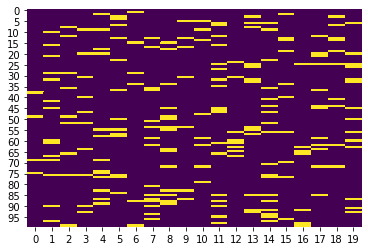

In [202]:

# find missing values in a dataframe. It returns a boolean for each element in the dataframe.
# ------
# df.isnull() 
# df[df.isnull().any(axis=1)]


# for NaN values, either drop or impute
# ------
# df.dropna() # can drop missing values

# df.fillna() # can impute by filling them in some values 





# seaborn -> a tool to identify (patterns in) missing values
# ------ 1.
import seaborn as sns
na_df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))
na_df
sns.heatmap(na_df.isnull(), cmap='viridis', cbar=False);


# ------ 2.
# Generate a larger synthetic dataset for demonstration
np.random.seed(2020)
npx = np.zeros((100,20))
mask = np.random.choice([True, False], npx.shape, p=[.1, .9])
npx[mask] = np.nan
sns.heatmap(pd.DataFrame(npx).isnull(), cmap='viridis', cbar=False);

## 3. series

#### 1) basic series

In [10]:
# -------------------------------- create our own series --------------------------
s = pd.Series(data = [2, 4, 6, 8, 10], index = ['Apple', 'Banana', 'Cherries', 'Dragon Fruit', 'Mango'], name = "A Column")
s

# rename
s.rename("another_name")

# access the data using numpy
# s.to_numpy()

# check elements type
# print(f"the type of elements in s:\n {s.map(type)}")
print(f"s dtype: {s.dtype}")

# check memory usage
print(f"s memory usage: {s.memory_usage(deep=True)} bytes")

s dtype: int64
s memory usage: 361 bytes


#### 2) series indexing

In [11]:
# 1. number indexing
s[[1, 2, 3]]
s[0:3]



# 2. key indexing
s["Apple"]
s[['Apple', 'Banana', 'Cherries', 'Dragon Fruit', 'Mango']]



# 3. boolean indexing with series
s[s > s.mean()]

Dragon Fruit     8
Mango           10
Name: A Column, dtype: int64

#### 3) series operations

[Doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

In [12]:
# for two series, the operations are done based on labels/indexes
s1 = pd.Series(data = range(4), index = ["A", "B", "C", "D"])
s2 = pd.Series(data = range(10, 14), index = ["B", "C", "D", "E"])

s1 + s2

# for a single series
s1 ** 2
np.exp(s1)
s1.mean()
s1.sum()
s1.astype("float")
s1.add(3.141).pow(2).mean() #piping

# print all common methods
# print([_ for _ in dir(pd.Series) if not _.startswith("_")]) 

22.788881